
# Bayesian Inference: Bayes' Theorem, Prior and Posterior Distributions, and Markov Chain Monte Carlo (MCMC)

## Overview
Bayesian inference is a statistical method that applies Bayes' theorem to update the probability of a hypothesis as new data or evidence becomes available. It is commonly used in fields such as machine learning, scientific computing, and data science.

In this notebook, we will explore:

- **Bayes' Theorem**: The foundation of Bayesian inference.
- **Prior and Posterior Distributions**: Incorporating prior knowledge with new data to form a posterior distribution.
- **Markov Chain Monte Carlo (MCMC)**: A computational method for approximating posterior distributions.



## 1. Bayes' Theorem

Bayes' theorem describes the relationship between the probability of a hypothesis before and after observing new evidence:

\[ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} \]

where:
- \( P(A) \) is the **prior** probability of hypothesis \( A \) before observing \( B \).
- \( P(B|A) \) is the **likelihood**, the probability of observing \( B \) given that \( A \) is true.
- \( P(B) \) is the **evidence** or marginal probability of \( B \).
- \( P(A|B) \) is the **posterior** probability of \( A \) after observing \( B \).

Let's calculate Bayes' theorem with a simple example.


In [1]:

# Example of Bayes' Theorem
# P(A) = Prior probability of A
# P(B|A) = Likelihood of B given A
# P(B) = Probability of B

P_A = 0.01  # Prior probability of a rare disease
P_B_given_A = 0.95  # Probability of a positive test result given the disease
P_B = 0.02  # Probability of a positive test result

# Posterior probability P(A|B)
P_A_given_B = (P_B_given_A * P_A) / P_B
print("Posterior Probability P(A|B):", P_A_given_B)


Posterior Probability P(A|B): 0.475



## 2. Prior and Posterior Distributions

In Bayesian inference, prior distributions represent our initial beliefs about parameters before observing any data. Observing data updates this belief, forming the posterior distribution.

### Example: Coin Flip

Suppose we have a coin with an unknown probability of landing heads (\( p \)), and we model \( p \) with a prior distribution. After observing coin flips, we can update our prior with this data to form a posterior distribution.

Let's use a **Beta distribution** as the prior for \( p \) and update it with observed data (successes and failures).


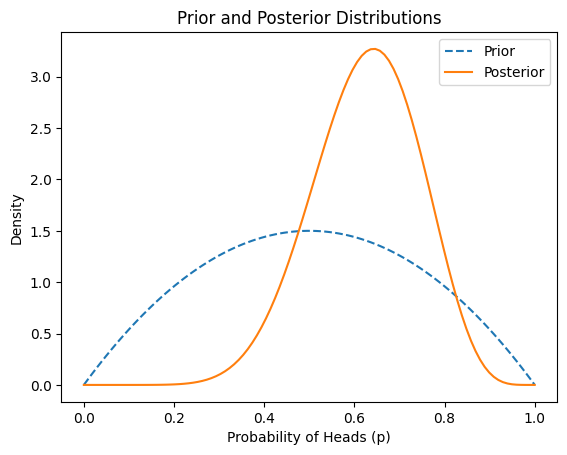

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior parameters (alpha and beta for the Beta distribution)
alpha_prior = 2
beta_prior = 2

# Observed data: 8 heads, 4 tails
heads = 8
tails = 4

# Posterior parameters
alpha_post = alpha_prior + heads
beta_post = beta_prior + tails

# Plot prior and posterior
x = np.linspace(0, 1, 100)
prior_pdf = beta.pdf(x, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(x, alpha_post, beta_post)

plt.plot(x, prior_pdf, label="Prior", linestyle="--")
plt.plot(x, posterior_pdf, label="Posterior")
plt.xlabel("Probability of Heads (p)")
plt.ylabel("Density")
plt.title("Prior and Posterior Distributions")
plt.legend()
plt.show()



## 3. Markov Chain Monte Carlo (MCMC)

MCMC methods are used to approximate posterior distributions when analytical solutions are difficult to obtain. MCMC generates samples from the posterior distribution using methods like the **Metropolis-Hastings** algorithm or **Gibbs sampling**.

Here, we'll use the `emcee` library to perform MCMC sampling for estimating the mean of a normal distribution.


You must install the tqdm library to use progress indicators with emcee


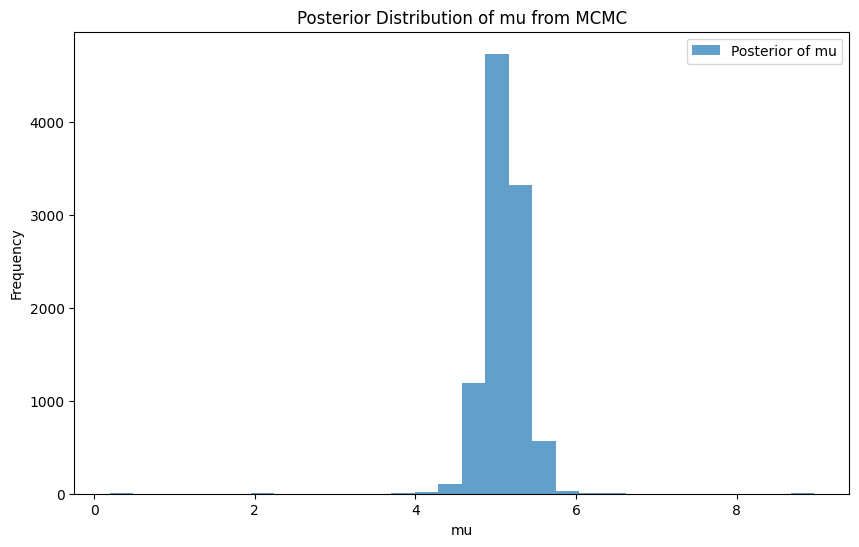

In [3]:

import emcee

# Define the likelihood function
def log_likelihood(theta, data):
    mu, sigma = theta
    return -0.5 * np.sum(((data - mu) / sigma) ** 2 + np.log(2 * np.pi * sigma ** 2))

# Define the prior
def log_prior(theta):
    mu, sigma = theta
    if 0 < sigma < 10:
        return 0.0  # Flat prior for sigma
    return -np.inf  # Log-prob of -inf means "impossible"

# Define the posterior probability
def log_posterior(theta, data):
    return log_prior(theta) + log_likelihood(theta, data)

# Generate synthetic data
np.random.seed(0)
data = np.random.normal(5, 2, size=100)

# Set up MCMC sampler
n_walkers = 10
n_steps = 1000
initial_guesses = np.random.rand(n_walkers, 2) * [10, 1]

sampler = emcee.EnsembleSampler(n_walkers, 2, log_posterior, args=[data])
sampler.run_mcmc(initial_guesses, n_steps, progress=True)

# Plot MCMC trace
samples = sampler.get_chain(flat=True)
plt.figure(figsize=(10, 6))
plt.hist(samples[:, 0], bins=30, alpha=0.7, label="Posterior of mu")
plt.xlabel("mu")
plt.ylabel("Frequency")
plt.title("Posterior Distribution of mu from MCMC")
plt.legend()
plt.show()



## Summary

In this notebook, we explored:

- **Bayes' Theorem**: The core formula for updating beliefs with evidence.
- **Prior and Posterior Distributions**: Updating prior knowledge with observed data to form the posterior distribution.
- **Markov Chain Monte Carlo (MCMC)**: A powerful method for sampling from posterior distributions.
